## Literature search

To be able to reproduce the results of my web search for articles for my systematic review, I used the code below.

We use PubMed for the search.

In [1]:
from pymed import PubMed
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
pubmed = PubMed(tool="MyTool", email="allen@dkfz-heidelberg.de")

def figurePanelDefaultSize():
    """
    Use to keep the size of panels similar across figures
    """
    return (1.8,1.8)

def setFigureDefaultParameters():
    matplotlib.rcdefaults()
    plt.rc('axes', labelsize=10) #fontsize of the title
    plt.rc('axes', titlesize=10) #fontsize of the title
    plt.rc('axes', linewidth=1.25) 
    plt.rc("xtick.major", width=1.25)
    plt.rc("ytick.major", width=1.25)

This is just an example of how we can retrieve articles from a database search. Not part of the review.

In [2]:
def results_to_dict(results):
    articleList = []
    for article in results:
        articleDict = article.toDict()
        articleList.append(articleDict)
    return articleList

We found 5 articles


dict_keys(['pubmed_id', 'title', 'abstract', 'keywords', 'journal', 'publication_date', 'authors', 'methods', 'conclusions', 'results', 'copyrights', 'doi', 'xml'])

We build a list of queries and then loop through them to retrieve our paper of interests.

We can do separate searches instead of combining many together. This gives data to identify the popular terms.

Put the publication date filter at the end.

In [4]:
startDate="2019/01/01"
endDate="2024/04/01"
dateFilter = f"(\"{startDate}\"[Date - Publication] : \"{endDate}\"[Date - Publication])"
dateFilter

'("2019/01/01"[Date - Publication] : "2024/04/01"[Date - Publication])'

In [13]:
queryList = [# queries with explainable AI and human-AI interactions, without reference to cancer
             "(human-AI interactions) AND (explainable AI)",
             "(human-centered AI) AND (explainable AI)",
             "(human-machine interactions) AND (explainable AI)",
             
             # queries with human-AI interactions and cancer
             "(human-AI interactions) AND ((cancer radiology) OR (oncology) OR (cancer))",
             "(human-centered AI) AND ((cancer radiology) OR (oncology) OR (cancer))",
             "(human-machine interactions) AND ((cancer radiology) OR (oncology) OR (cancer))",
            
             # queries with explainable AI and 3 specific areas of oncology, otherwise we get too many results
             "(explainable AI) AND (cancer radiology)",
             "(explainable AI) AND (skin cancer)",
             "(explainable AI) AND (melanoma)",
             
             # control queries
             "(cancer radiology) AND (AI)",
             "(melanoma) AND (AI)"]

In [14]:
queryList = [ q+f" AND {dateFilter}"for q in queryList]

In [15]:
queryList

['(human-AI interactions) AND (explainable AI) AND ("2019/01/01"[Date - Publication] : "2024/04/01"[Date - Publication])',
 '(human-centered AI) AND (explainable AI) AND ("2019/01/01"[Date - Publication] : "2024/04/01"[Date - Publication])',
 '(human-machine interactions) AND (explainable AI) AND ("2019/01/01"[Date - Publication] : "2024/04/01"[Date - Publication])',
 '(human-AI interactions) AND ((cancer radiology) OR (oncology) OR (cancer)) AND ("2019/01/01"[Date - Publication] : "2024/04/01"[Date - Publication])',
 '(human-centered AI) AND ((cancer radiology) OR (oncology) OR (cancer)) AND ("2019/01/01"[Date - Publication] : "2024/04/01"[Date - Publication])',
 '(human-machine interactions) AND ((cancer radiology) OR (oncology) OR (cancer)) AND ("2019/01/01"[Date - Publication] : "2024/04/01"[Date - Publication])',
 '(explainable AI) AND (cancer radiology) AND ("2019/01/01"[Date - Publication] : "2024/04/01"[Date - Publication])',
 '(explainable AI) AND (skin cancer) AND ("2019/01/0

Create a nice representation of the query for plotting.

In [16]:
def format_query(q):
    q = q.split("AND")[:-1]
    q = [str.strip() for str in q]
    q = [str.replace("(","") for str in q]
    q = [str.replace(")","") for str in q]
    q = " AND ".join(q)
    q = q[0].upper() + q[1:]
    return q

In [17]:
dfQueries= pd.DataFrame({"query": queryList,
                         "queryFormatted": [ format_query(q) for q in queryList],
                         "queryNo": np.arange(len(queryList))})

In [18]:
dfQueries


,query,queryFormatted,queryNo
0,(human-AI interactions) AND (explainable AI) A...,Human-AI interactions AND explainable AI,0
1,(human-centered AI) AND (explainable AI) AND (...,Human-centered AI AND explainable AI,1
2,(human-machine interactions) AND (explainable ...,Human-machine interactions AND explainable AI,2
3,(human-AI interactions) AND ((cancer radiology...,Human-AI interactions AND cancer radiology OR ...,3
4,(human-centered AI) AND ((cancer radiology) OR...,Human-centered AI AND cancer radiology OR onco...,4
5,(human-machine interactions) AND ((cancer radi...,Human-machine interactions AND cancer radiolog...,5
6,"(explainable AI) AND (cancer radiology) AND (""...",Explainable AI AND cancer radiology,6
7,"(explainable AI) AND (skin cancer) AND (""2019/...",Explainable AI AND skin cancer,7
8,"(explainable AI) AND (melanoma) AND (""2019/01/...",Explainable AI AND melanoma,8
9,"(cancer radiology) AND (AI) AND (""2019/01/01""[...",Cancer radiology AND AI,9


In [19]:
fn = "results/dfQueries"
print("Saving",fn)
dfQueries.to_csv(fn)

Saving results/dfQueries


Fetch our articles

In [20]:
articleList = []
for i, query in enumerate(queryList):
    print(f"Fetching articles for query {i}: {query}")
    results = pubmed.query(query, max_results=100000)
    myRes = results_to_dict(results) # get a list of dictionaries from itertools.chain object
    # add a query field to the dictionaries
    for d in myRes:
        d["queryNo"] = i
    print(f"Found {len(myRes)} articles")
    articleList = articleList + myRes

Fetching articles for query 0: (human-AI interactions) AND (explainable AI) AND ("2019/01/01"[Date - Publication] : "2024/04/01"[Date - Publication])
Found 14 articles
Fetching articles for query 1: (human-centered AI) AND (explainable AI) AND ("2019/01/01"[Date - Publication] : "2024/04/01"[Date - Publication])
Found 32 articles
Fetching articles for query 2: (human-machine interactions) AND (explainable AI) AND ("2019/01/01"[Date - Publication] : "2024/04/01"[Date - Publication])
Found 13 articles
Fetching articles for query 3: (human-AI interactions) AND ((cancer radiology) OR (oncology) OR (cancer)) AND ("2019/01/01"[Date - Publication] : "2024/04/01"[Date - Publication])
Found 11 articles
Fetching articles for query 4: (human-centered AI) AND ((cancer radiology) OR (oncology) OR (cancer)) AND ("2019/01/01"[Date - Publication] : "2024/04/01"[Date - Publication])
Found 21 articles
Fetching articles for query 5: (human-machine interactions) AND ((cancer radiology) OR (oncology) OR (c

In [21]:
articleList[0].keys()

dict_keys(['pubmed_id', 'title', 'abstract', 'keywords', 'journal', 'publication_date', 'authors', 'methods', 'conclusions', 'results', 'copyrights', 'doi', 'xml', 'queryNo'])

In [22]:
dfArticles = pd.DataFrame({"title": [ a["title"] for a in articleList],
                   "pubmedId" : [ a["pubmed_id"].split("\n")[0] for a in articleList],
                   "queryNo" : [ a["queryNo"] for a in articleList],
                   "publication_date": [ a["publication_date"] for a in articleList]})
                   #'journal': ([ a["journal"] for a in articleList])})
dfArticles.publication_date = pd.to_datetime(dfArticles.publication_date)                   

In [23]:
print(f"Number of items retrieved: {len(dfArticles.pubmedId)} articles")
print(f"Number of unique items retrieved: {len(dfArticles.pubmedId.unique())}")

Number of items retrieved: 6405 articles
Number of unique items retrieved: 6135


Calculate the number of articles per queries.

In [24]:
seriesvc = dfArticles.queryNo.value_counts()

In [25]:
# merge two dataframe based on queryNo
dfQueries = dfQueries.merge(seriesvc, on='queryNo')
dfQueries.rename(columns={"count":"nArticles"}, inplace=True)
dfQueries

,query,queryFormatted,queryNo,nArticles
0,(human-AI interactions) AND (explainable AI) A...,Human-AI interactions AND explainable AI,0,14
1,(human-centered AI) AND (explainable AI) AND (...,Human-centered AI AND explainable AI,1,32
2,(human-machine interactions) AND (explainable ...,Human-machine interactions AND explainable AI,2,13
3,(human-AI interactions) AND ((cancer radiology...,Human-AI interactions AND cancer radiology OR ...,3,11
4,(human-centered AI) AND ((cancer radiology) OR...,Human-centered AI AND cancer radiology OR onco...,4,21
5,(human-machine interactions) AND ((cancer radi...,Human-machine interactions AND cancer radiolog...,5,14
6,"(explainable AI) AND (cancer radiology) AND (""...",Explainable AI AND cancer radiology,6,64
7,"(explainable AI) AND (skin cancer) AND (""2019/...",Explainable AI AND skin cancer,7,50
8,"(explainable AI) AND (melanoma) AND (""2019/01/...",Explainable AI AND melanoma,8,43
9,"(cancer radiology) AND (AI) AND (""2019/01/01""[...",Cancer radiology AND AI,9,3442


In [26]:
fn = "results/dfQueries"
print("Saving",fn)
dfQueries.to_csv(fn)

Saving results/dfQueries


In [27]:
dfQueries

,query,queryFormatted,queryNo,nArticles
0,(human-AI interactions) AND (explainable AI) A...,Human-AI interactions AND explainable AI,0,14
1,(human-centered AI) AND (explainable AI) AND (...,Human-centered AI AND explainable AI,1,32
2,(human-machine interactions) AND (explainable ...,Human-machine interactions AND explainable AI,2,13
3,(human-AI interactions) AND ((cancer radiology...,Human-AI interactions AND cancer radiology OR ...,3,11
4,(human-centered AI) AND ((cancer radiology) OR...,Human-centered AI AND cancer radiology OR onco...,4,21
5,(human-machine interactions) AND ((cancer radi...,Human-machine interactions AND cancer radiolog...,5,14
6,"(explainable AI) AND (cancer radiology) AND (""...",Explainable AI AND cancer radiology,6,64
7,"(explainable AI) AND (skin cancer) AND (""2019/...",Explainable AI AND skin cancer,7,50
8,"(explainable AI) AND (melanoma) AND (""2019/01/...",Explainable AI AND melanoma,8,43
9,"(cancer radiology) AND (AI) AND (""2019/01/01""[...",Cancer radiology AND AI,9,3442


We can make a summary plot of the results

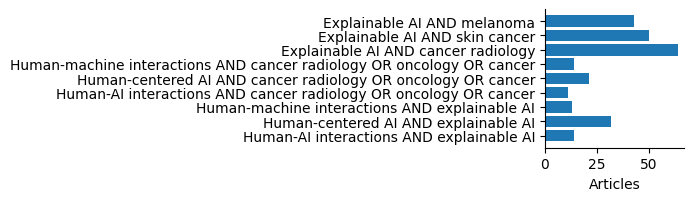

In [28]:
def plot_articles_per_query(ax,df):
    
    ylabels = df.queryFormatted
    ypos = np.arange(len(ylabels))
    ax.barh(ypos,df["nArticles"])
    ax.set_yticks(ypos,ylabels)
    ax.set_ylabel("")
    ax.set_xlabel("Articles")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False) 

rowSize,colSize= figurePanelDefaultSize()
fig, ax = plt.subplots(1, 1, figsize=(colSize,rowSize))

df = dfQueries[~dfQueries.queryFormatted.str.contains("AND AI")] # remove the control searches
plot_articles_per_query(ax,df)

It could be interesting to show that explainable AI is on the rise, the frequency of articles should be increasing with time.

In [29]:
# test if explainable AI is in the query
qExplainable = dfQueries.queryNo[dfQueries.queryFormatted.str.contains("Explainable AI",case=False)]
print("Queries with XAI")
print(qExplainable)
dfXAIArticles= dfArticles[dfArticles.queryNo.isin(qExplainable)]

Queries with XAI
0    0
1    1
2    2
6    6
7    7
8    8
Name: queryNo, dtype: int64


In [30]:
def plot_distribution_pub_dates(ax,df,ylabel="Articles"):
    ax.hist(df['publication_date'], bins=4*4+1) # 4 years and 1 quarter
    ax.set_xlabel('Publication Date')
    ax.set_ylabel(ylabel)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # show the dates on the x-axis, only show 2020 and 2024
    ax.set_xticks([datetime(2020,1,1),datetime(2022,1,1),datetime(2024,1,1)])
    # set the xticks labels
    ax.set_xticklabels(['2020', '2022', '2024'])
 

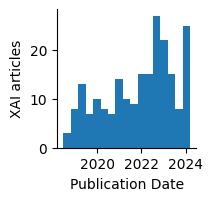

In [31]:
rowSize,colSize= figurePanelDefaultSize()
fig, ax = plt.subplots(1, 1, figsize=(colSize, rowSize))
plot_distribution_pub_dates(ax,dfXAIArticles,ylabel="XAI articles")

In [32]:
qHuman = dfQueries.queryNo[dfQueries.queryFormatted.str.contains("Human-centered AI",case=False)]
print("Queries with Human-centered AI")
print(qHuman)
dfHumanArticles= dfArticles[dfArticles.queryNo.isin(qHuman)]

Queries with Human-centered AI
1    1
4    4
Name: queryNo, dtype: int64


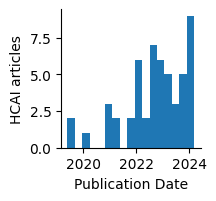

In [33]:
rowSize,colSize= figurePanelDefaultSize()
fig, ax = plt.subplots(1, 1, figsize=(colSize, rowSize))
plot_distribution_pub_dates(ax,dfHumanArticles,ylabel="HCAI articles")

In [34]:
dfQueries

,query,queryFormatted,queryNo,nArticles
0,(human-AI interactions) AND (explainable AI) A...,Human-AI interactions AND explainable AI,0,14
1,(human-centered AI) AND (explainable AI) AND (...,Human-centered AI AND explainable AI,1,32
2,(human-machine interactions) AND (explainable ...,Human-machine interactions AND explainable AI,2,13
3,(human-AI interactions) AND ((cancer radiology...,Human-AI interactions AND cancer radiology OR ...,3,11
4,(human-centered AI) AND ((cancer radiology) OR...,Human-centered AI AND cancer radiology OR onco...,4,21
5,(human-machine interactions) AND ((cancer radi...,Human-machine interactions AND cancer radiolog...,5,14
6,"(explainable AI) AND (cancer radiology) AND (""...",Explainable AI AND cancer radiology,6,64
7,"(explainable AI) AND (skin cancer) AND (""2019/...",Explainable AI AND skin cancer,7,50
8,"(explainable AI) AND (melanoma) AND (""2019/01/...",Explainable AI AND melanoma,8,43
9,"(cancer radiology) AND (AI) AND (""2019/01/01""[...",Cancer radiology AND AI,9,3442


In [35]:
qMelanomaAI = dfQueries.queryNo[dfQueries.queryFormatted.str.contains("Melanoma AND AI")]
print("Melanoma and AI")
print(qMelanomaAI)
dfMelanomaAI= dfArticles[dfArticles.queryNo.isin(qMelanomaAI)]

Melanoma and AI
10    10
Name: queryNo, dtype: int64


Somehow we have publication dates before the startDate when searching for Melanoma and AI.

In [36]:
dateFormat = '%Y/%m/%d'
date = datetime.strptime(startDate, dateFormat)
dfMelanomaAI = dfMelanomaAI[dfMelanomaAI.publication_date>date]


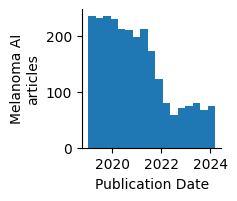

In [37]:
rowSize,colSize= figurePanelDefaultSize()
fig, ax = plt.subplots(1, 1, figsize=(colSize, rowSize))
plot_distribution_pub_dates(ax,dfMelanomaAI,ylabel="Melanoma AI\narticles")

In [38]:
qCancerRadiologyAI = dfQueries.queryNo[dfQueries.queryFormatted.str.contains("Cancer radiology AND AI")]
print("Cancer radiology and AI")
print(qCancerRadiologyAI)
dfCancerRadiologyAI= dfArticles[dfArticles.queryNo.isin(qCancerRadiologyAI)]
dfCancerRadiologyAI = dfCancerRadiologyAI[dfCancerRadiologyAI.publication_date>date]

Cancer radiology and AI
9    9
Name: queryNo, dtype: int64


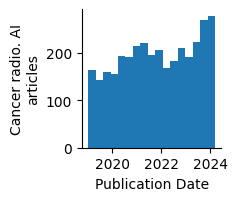

In [39]:
rowSize,colSize= figurePanelDefaultSize()
fig, ax = plt.subplots(1, 1, figsize=(colSize, rowSize))
plot_distribution_pub_dates(ax,dfCancerRadiologyAI,ylabel="Cancer radio. AI\narticles")

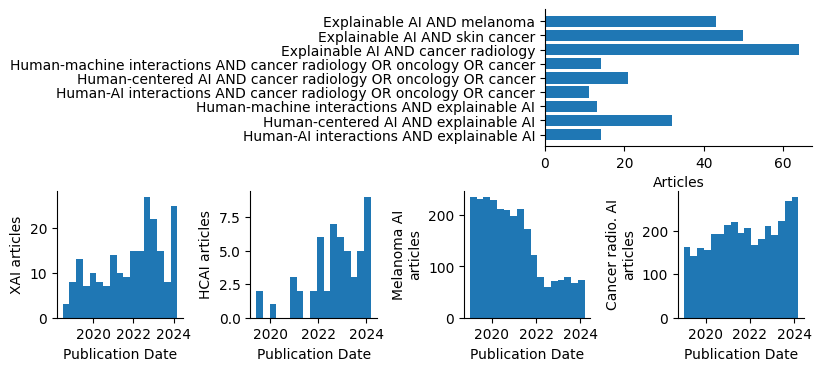

In [40]:
fig = plt.figure(figsize=(colSize*4.5, rowSize*2),constrained_layout=True)
topSpec = fig.add_gridspec(ncols=2, nrows=2, height_ratios=[0.8,1])
bottomSpec = fig.add_gridspec(ncols=4, nrows=2,  height_ratios=[1,0.7])

ax = fig.add_subplot(topSpec[0,:]) 
df = dfQueries[~dfQueries.queryFormatted.str.contains("AND AI")] # remove the control searches
plot_articles_per_query(ax,df)

ax = fig.add_subplot(bottomSpec[1,0]) 
plot_distribution_pub_dates(ax,dfXAIArticles,ylabel="XAI articles")

ax = fig.add_subplot(bottomSpec[1,1]) 
plot_distribution_pub_dates(ax,dfHumanArticles,ylabel="HCAI articles")

ax = fig.add_subplot(bottomSpec[1,2]) 
plot_distribution_pub_dates(ax,dfMelanomaAI,ylabel="Melanoma AI\narticles")

ax = fig.add_subplot(bottomSpec[1,3]) 
plot_distribution_pub_dates(ax,dfCancerRadiologyAI,ylabel="Cancer radio. AI\narticles")

Create a DataFrame with unique entries for the review. Remove entries for our control searches.

In [41]:
dfArticles
q = dfQueries[~dfQueries.queryFormatted.str.contains("AND AI")].queryNo # this is used to remove the control queries
dfArticles = dfArticles[dfArticles.queryNo.isin(q)]


In [42]:
myList = []
for pubmedId in dfArticles.pubmedId.unique():
    adf = dfArticles[dfArticles.pubmedId==pubmedId]
    queryList = adf.queryNo.to_string(header=False,index=False).split('\n')
    entry = {"title":adf.title.iloc[0],
             "publication_date":adf.publication_date.iloc[0],
             #"journal":adf.journal.iloc[0],
             "pubmedId":pubmedId,
             "queryIds":queryList}
    myList.append(entry)

In [43]:
dfUniqueArticles = pd.DataFrame({"title":[a["title"] for a in myList],
                         "pubmedId":[a["pubmedId"] for a in myList],
                         "publication_date":[a["publication_date"] for a in myList],
                        #"journal":[a["journal"] for a in myList],
                          "queryIds":[a["queryIds"] for a in myList]   })


In [44]:
dfUniqueArticles.columns

Index(['title', 'pubmedId', 'publication_date', 'queryIds'], dtype='object')

In [45]:
dfUniqueArticles

,title,pubmedId,publication_date,queryIds
0,Media Forensic Considerations of the Usage of ...,38392094,2024-02-23,[0]
1,Towards Human-Centered Explainable AI: A Surve...,37956008,2023-11-13,"[0, 1]"
2,Human-AI teaming: leveraging transactive memor...,37599773,2023-08-21,[0]
3,PathNarratives: Data annotation for pathologic...,36777158,2023-02-14,"[0, 3]"
4,Explanatory machine learning for justified tru...,36504690,2022-12-13,[0]
...,...,...,...,...
212,TNF-α inhibitor reduces drug-resistance to ant...,32310956,2020-04-21,[8]
213,Treatment options in BRAF-mutant metastatic co...,32304411,2020-04-19,[8]
214,Heterotrimeric G,32122969,2020-03-04,[8]
215,Anticancer effects of alloxanthoxyletin and fa...,30544062,2018-12-14,[8]


Save the results to the `results` directory

In [46]:
fn = "results/dfUniqueArticles.csv"
print("saving",fn)
dfUniqueArticles.to_csv(fn)

saving results/dfUniqueArticles.csv
